## 第一題
- Q1-1: 建立class myknn_regressor
    - contructor: 設置k與模式
    - fit()
        - 紀錄資料點，並標準化所有feature
    - predict()
        - 預測資料點
        - 根據模式決定是否移除outliers
        - 與training data的距離使用L1 norm

In [41]:
import pickle
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

class myknn_regressor:
	k = 0
	mode = ""
	X_tr = np.array([])
	Y_tr = np.array([])
	X_mean = np.array([])
	X_std = np.array([])
	
	def __init__(self, k, mode):
		self.k = k
		self.mode = mode
		
	def fit(self, X_train, Y_train):
		X_t = np.transpose(X_train)
		for i in range(0, 90):
			mean = np.mean(X_t[i])
			std = np.std(X_t[i])
			X_t[i] = (X_t[i] - mean) / std
			self.X_mean = np.append(self.X_mean, mean)
			self.X_std = np.append(self.X_std, std)
		self.X_tr = np.transpose(X_t)
		self.Y_tr = Y_train
		
	def predict(self, X_test):
		X_t = np.array([])
		size_arr = np.array([])
		X_t = X_test - self.X_mean
		X_t = np.divide(X_t, self.X_std)
		for i in range(0, 5000):
			size_arr = np.append(size_arr, np.sum(np.abs(X_t - X_train[i])))
			# size_arr = np.append(size_arr, np.sum(np.abs(X_test[j] - X_train[i])))
		index_list = []
		for i in range(0, self.k):
			index = np.argmin(size_arr)
			index_list.append(index)
			size_arr[index] = float("inf")
			
		y_predict = 0
		if self.mode == "equal_weight" or self.k < 10:
			for i in index_list:
				y_predict += self.Y_tr[i]
			y_predict /= self.k
		elif self.mode == "remove_outliers":
			y_predict_list = np.array([])
			for i in index_list:
				y_predict_list = np.append(y_predict_list, self.Y_tr[i])
			Q1 = np.quantile(y_predict_list, 0.25)
			Q3 = np.quantile(y_predict_list, 0.75)
			IQR = Q3 - Q1
			lower = Q1 - 1.5*IQR
			upper = Q3 + 1.5*IQR
			list_remove_outliers = []
			
			count = 0
			for i in range(0, self.k):
				if y_predict_list[i] < lower or y_predict_list[i] > upper: continue
				else:
					count += 1
					list_remove_outliers.append(y_predict_list[i])
			for i in list_remove_outliers:
				y_predict += i
			y_predict /= count
		return y_predict

- 讀取資料

In [42]:
file = open("msd_data1.pickle", "rb")
pk = pickle.load(file)

X_train = np.array(pk["X_train"])
Y_train = np.array(pk["Y_train"])
X_test = np.array(pk["X_test"])
Y_test = np.array(pk["Y_test"])

- Q1-2: k = 20, equal_weight
    - 列出前20筆預測值
    - 列出RMSE

In [10]:
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
MSE = 0
for i in range(0, 3000):
	y_predict = myknn.predict(X_test[i])
	if i < 20: print(y_predict)
	MSE += (y_predict - Y_test[i])**2
MSE /= 3000
RMSE = MSE ** 0.5
print("RMSE = " + str(RMSE))

1994.85
1992.5
2001.55
1986.7
1990.65
1997.1
1993.15
1990.7
2001.0
2003.15
2001.25
1999.45
1997.25
1998.2
1995.2
1995.35
1990.4
2002.2
2001.6
1993.75
RMSE = 10.214277874622372


- Q1-3, k = 20, remove_outliers
    - 列出前20筆預測值
    - 列出 RMSE

In [16]:
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
MSE = 0
for i in range(0, 3000):
	y_predict = myknn.predict(X_test[i])
	if i < 20: print(y_predict)
	MSE += (y_predict - Y_test[i])**2
MSE /= 3000
RMSE = MSE ** 0.5
print("RMSE = " + str(RMSE))

1996.2631578947369
1992.5
2001.55
1986.7
1990.65
1997.1
1993.15
1990.7
2002.2631578947369
2003.15
2001.25
2001.5555555555557
2000.4444444444443
1998.2
1995.2
1995.35
1990.4
2004.611111111111
2001.6
1993.75
RMSE = 10.173395687255912


- 結論
    - 去除極端值的RMSE較小

## 第二題: Tuning Hyperparameters
- First case
    - KNeighborsRegressor
    - 標準化feature

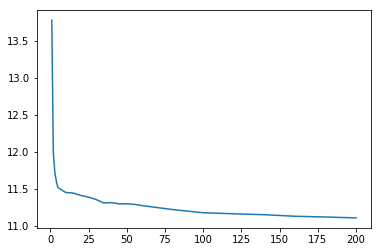

In [43]:
X_train = np.transpose(X_train)
X_mean = np.array([])
X_std = np.array([])
for i in range(0, 90):
	mean = np.mean(X_train[i])
	std = np.std(X_train[i])
	X_train[i] = (X_train[i] - mean) / std
	X_mean = np.append(X_mean, mean)
	X_std = np.append(X_std, std)
X_train = np.transpose(X_train)

k_list = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]
RMSE_list1 = []
for k in k_list:
	neigh = KNeighborsRegressor(n_neighbors = k)
	neigh.fit(X_train, Y_train)
	MSE = 0
	for i in range(0, 3000):
		y_predict = neigh.predict(np.array(X_test[i]).reshape(1, -1))
		MSE += (y_predict[0] - Y_test[i])**2
	MSE /= 3000
	RMSE = MSE ** 0.5
	RMSE_list1.append(RMSE)
plt.plot(k_list, RMSE_list1)
plt.show()

- Second case
    - KNeighborsRegressor
    - 不標準化feature

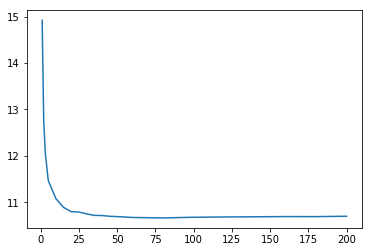

In [44]:
X_train = np.array(pk["X_train"])
Y_train = np.array(pk["Y_train"])
X_test = np.array(pk["X_test"])
Y_test = np.array(pk["Y_test"])

k_list = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]
RMSE_list2 = []
for k in k_list:
	neigh = KNeighborsRegressor(n_neighbors = k)
	neigh.fit(X_train, Y_train)
	MSE = 0
	for i in range(0, 3000):
		y_predict = neigh.predict(np.array(X_test[i]).reshape(1, -1))
		MSE += (y_predict[0] - Y_test[i])**2
	MSE /= 3000
	RMSE = MSE ** 0.5
	RMSE_list2.append(RMSE)
plt.plot(k_list, RMSE_list2)
plt.show()

- Third case
    - myknn_regressor
    - 標準化feature

In [ ]:
k_list = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]
RMSE_list3 = []
for k in k_list:
	myknn = myknn_regressor(k, "remove_outliers")
	myknn.fit(X_train, Y_train)
	MSE = 0
	for i in range(0, 3000):
		y_predict = myknn.predict(X_test[i])
		MSE += (y_predict - Y_test[i])**2
	MSE /= 3000
	RMSE = MSE ** 0.5
	RMSE_list3.append(RMSE)
plt.plot(k_list, RMSE_list3)
plt.show()

- Plotting the curves together

In [ ]:
plt.plot(k_list, RMSE_list1, color = "blue", label = "case 1")
plt.plot(k_list, RMSE_list2, color = "green", label = "case 2")
plt.plot(k_list, RMSE_list3, color = "red", label = "case 3")
plt.legend()

- 結論
    - 三個case中k與RMSE的關係大致呈U型曲線
    - Case 1與 Case 2相比，將feature標準化後表現比較好
    - Case 3在k = 3附近有最局部最小的RMSE，而後小幅上升，之後隨著k增加持續下降